<a href="https://colab.research.google.com/github/AmithisCurious/Handwritten_Text_Recognition/blob/main/HTR_V1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Nadam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping 
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.utils import shuffle

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data...
data= pd.read_csv("/content/drive/MyDrive/A_Z Handwritten Data.csv").astype('float32')

# Split data the X - Our data , and y - the prdict label
X = data.drop('0',axis = 1)
y = data['0']


In [ ]:
# Reshaping the data in csv file so that it can be displayed as an image...

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))


print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

# Dictionary for getting characters from index values...
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}


Train data shape:  (279337, 28, 28)
Test data shape:  (93113, 28, 28)


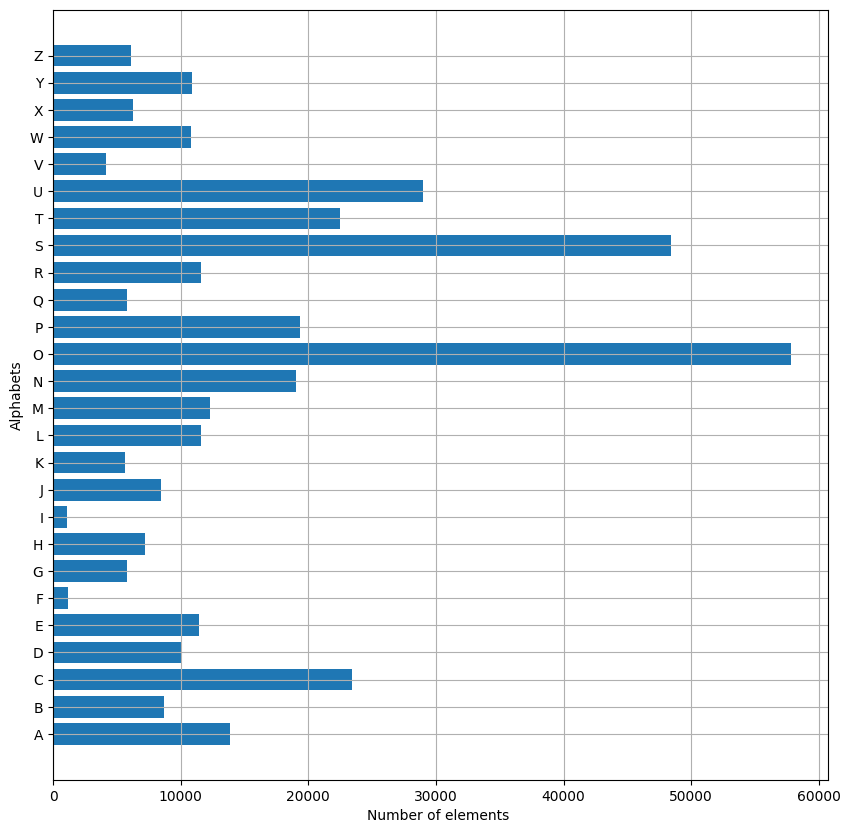

In [ ]:
# Plotting the number of alphabets in the dataset...

train_yint = np.int0(y) #Doubt
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()


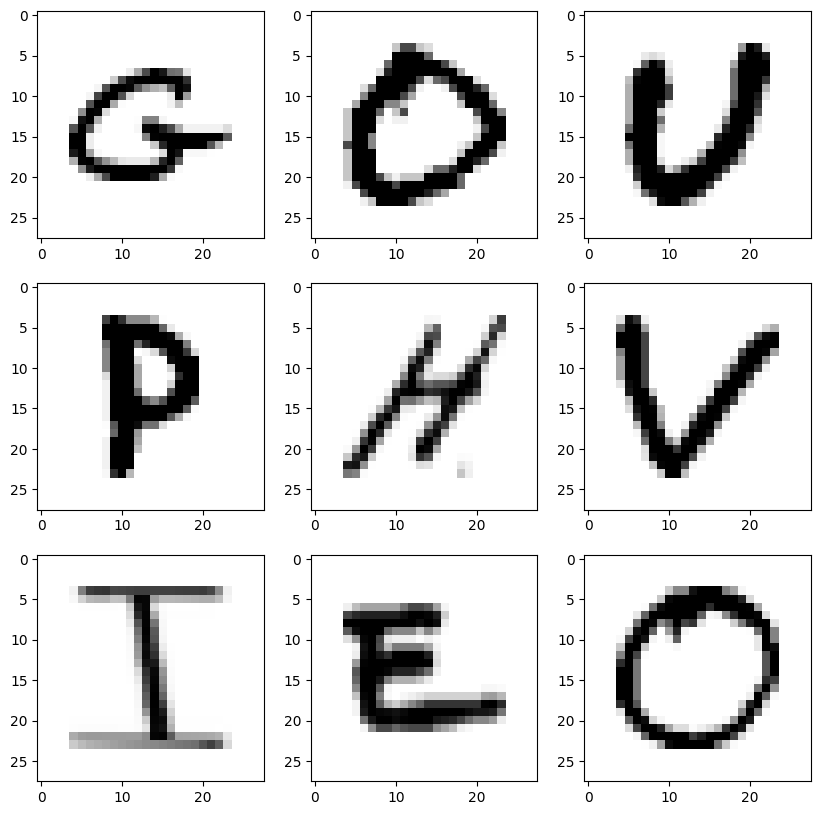

New shape of train data:  (279337, 28, 28, 1)
New shape of train data:  (93113, 28, 28, 1)


In [ ]:
#Shuffling the data ...
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()


#Reshaping the training & test dataset so that it can be put in the model...

train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

In [ ]:
# Converting the labels to categorical values...

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)


New shape of train labels:  (279337, 26)
New shape of test labels:  (93113, 26)


In [ ]:
# CNN model...

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(448,activation ="relu"))
model.add(Dense(384,activation ="relu"))
model.add(Dense(320,activation ="relu"))
model.add(Dense(256,activation ="relu"))
model.add(Dense(192,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(64,activation ="relu"))


model.add(Dense(26,activation ="softmax"))



model.compile(optimizer = Nadam(learning_rate=0.0015), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001) 
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=1, verbose=1, mode='auto') 


history = model.fit(train_X, train_yOHE, epochs=2, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE)) 


model.summary()
model.save(r'model_hand.h5')


Epoch 1/2
8730/8730 [==============================] - 75s 8ms/step - loss: 0.2261 - accuracy: 0.9477 - val_loss: 0.1502 - val_accuracy: 0.9688 - lr: 0.0015
Epoch 2/2
8730/8730 [==============================] - 71s 8ms/step - loss: 0.1379 - accuracy: 0.9727 - val_loss: 0.1340 - val_accuracy: 0.9744 - lr: 0.0015
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D

Prev Best Accuray - 97.98%


In [ ]:
# Displaying the accuracies & losses for train & validation set...

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])



The validation accuracy is : [0.9687798619270325, 0.9743752479553223]
The training accuracy is : [0.9476689696311951, 0.9726853370666504]
The validation loss is : [0.15024086833000183, 0.13397185504436493]
The training loss is : [0.2261234074831009, 0.13794302940368652]


1/1 [==============================] - 0s 102ms/step
(93113, 28, 28, 1)


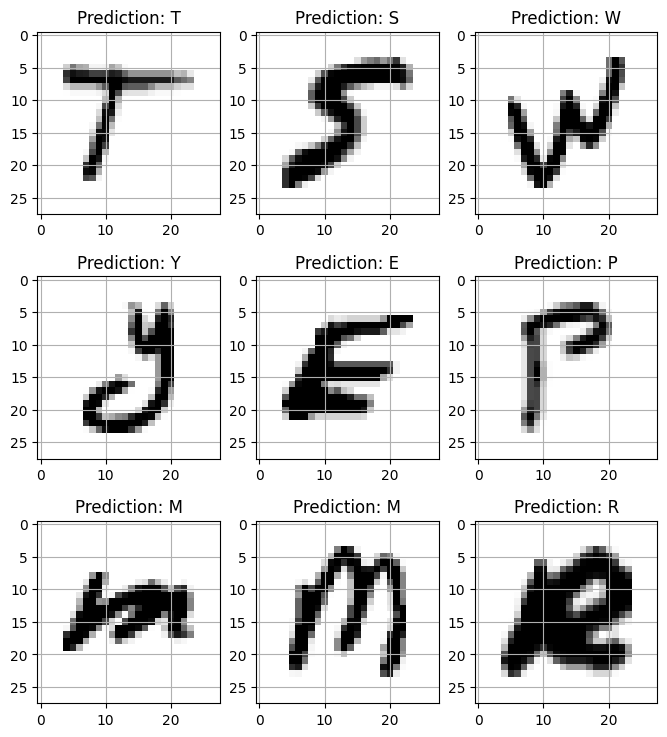

In [ ]:
#Making model predictions...

pred = model.predict(test_X[:9])
print(test_X.shape)


# Displaying some of the test images & their predicted labels...

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()


Enter Image nameP1


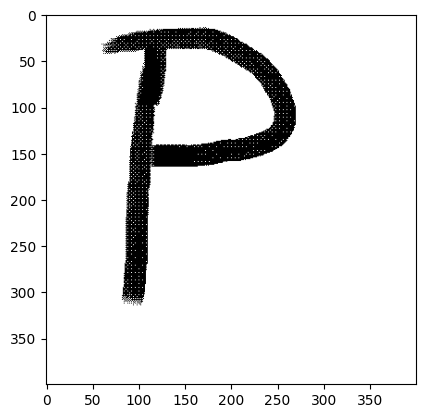

1/1 [==============================] - 0s 19ms/step
P


KeyboardInterrupt: ignored

In [ ]:
# Prediction on external image...
ch = 1
while ch == 1:
  path = input("Enter Image name")
  img = cv2.imread(f"/content/{path}.png")
  img_copy = img.copy()
  plt.imshow(img, cmap = "gray")
  plt.show()

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (400,440))

  img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
  img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
  _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

  img_final = cv2.resize(img_thresh, (28,28))
  img_final =np.reshape(img_final, (1,28,28,1))


  img_pred = word_dict[np.argmax(model.predict(img_final))]
  print(img_pred)
  ch = int(input("continue? 1/0"))